In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.8.1'

In [3]:
import torchvision
from torchvision.datasets import MNIST

In [4]:
torchvision.__version__

'0.9.1'

In [5]:
# Download the train dataset
dataset = MNIST(root = "./data/", download = True)

In [6]:
type(dataset), len(dataset)

(torchvision.datasets.mnist.MNIST, 60000)

In [7]:
test_dataset = MNIST(root = "./data/", download= True, train= False)
len(test_dataset)

10000

In [8]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x10BF222E0>, 5)

28 x 28 image. PIL is python image library

In [9]:
image, label = dataset[0]

Label:  5


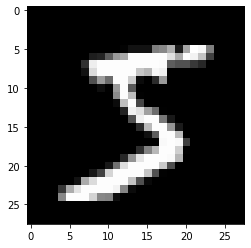

In [10]:
%matplotlib inline
plt.imshow(image, cmap='gray')
print("Label: ", label)

Label:  0


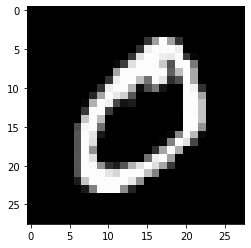

In [11]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print("Label: ", label)

In [12]:
type(image)

PIL.Image.Image

In [13]:
img_np = np.array(image)
img_np

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
img_ts = torch.from_numpy(img_np) 
img_ts

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [15]:
dataset_np = []
dataset_label_np = []
## Convert to tensor
for image, label in dataset:
    img_np = np.array(image)
    dataset_np.append(img_np.astype(np.float32))
    dataset_label_np.append(int(label))
    
dataset_np = np.array(dataset_np)
dataset_label_np = np.array(dataset_label_np)
    

In [16]:
print(len(dataset_np))
print(len(dataset_label_np))

60000
60000


In [17]:
type(dataset_np), type(dataset_label_np)

(numpy.ndarray, numpy.ndarray)

Other way - use transformers

In [18]:
import torchvision.transforms as transforms
dataset = MNIST(root = ".data/", download = True, transform = transforms.ToTensor())

In [19]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


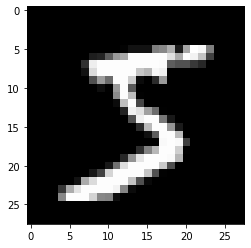

In [20]:
plt.imshow(img_tensor[0, :, :], cmap = 'gray')

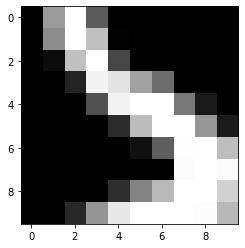

In [21]:
plt.imshow(img_tensor[0, 10:20, 10:20], cmap = 'gray')

# Data Split - Train Validation Split

In [22]:
def split_indices(n, val_pct):
    idx = np.random.permutation(n) #random numbers between 0 and the n given
    n_val = int(n * val_pct)
    idx_train = idx[n_val:]
    idx_val = idx[:n_val]
    return idx_train, idx_val

In [23]:
train_indices, val_indices = split_indices(len(dataset_np), val_pct = 0.2)

In [24]:
train_indices, train_indices.shape, val_indices, val_indices.shape

(array([24486, 10216, 58875, ..., 35687, 46080, 10341]),
 (48000,),
 array([22188, 14248, 33293, ..., 38823, 35168,  5448]),
 (12000,))

In [25]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import TensorDataset

In [26]:
dataset_np.shape, type(dataset_np), dataset_label_np.shape, type(dataset_label_np), dataset_label_np[0]

((60000, 28, 28), numpy.ndarray, (60000,), numpy.ndarray, 5)

In [27]:
dataset_ts = torch.from_numpy(dataset_np)
dataset_label_ts = torch.from_numpy(dataset_label_np)
dataset = TensorDataset(dataset_ts, dataset_label_ts )

In [68]:
batch_size = 500
train_sampler = SubsetRandomSampler(train_indices) # taking the train indices and use only those for sampling
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices) # taking the val indices and use only those for sampling
val_loader = DataLoader(dataset, batch_size, sampler = val_sampler)

# Model - Logistic Regression

nn.Linear  - the linear layer will have ```10``` neurons (since we want to predict values between ```0``` to ```9``` and it will have ```1 x 28 x 28``` features for each observation. So the dimension of the nn Linear layer is 28 * 28 = 784 x 10 dimensions 

In [69]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [70]:
print(model.weight.shape), print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


(None, None)

In [71]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([7, 7, 7, 2, 2, 3, 8, 7, 1, 7, 0, 8, 7, 7, 1, 2, 4, 6, 4, 7, 1, 2, 7, 6,
        2, 1, 4, 1, 6, 9, 2, 8, 1, 2, 1, 7, 3, 5, 8, 7, 0, 4, 1, 0, 8, 2, 0, 6,
        4, 2, 9, 1, 3, 5, 7, 3, 1, 5, 8, 0, 1, 1, 3, 4, 2, 0, 4, 3, 1, 3, 9, 0,
        2, 6, 8, 0, 2, 4, 7, 6, 3, 5, 2, 3, 8, 4, 8, 5, 6, 4, 4, 8, 8, 7, 0, 9,
        3, 9, 5, 0, 6, 9, 9, 2, 7, 7, 7, 0, 0, 4, 9, 3, 4, 5, 9, 3, 2, 7, 6, 1,
        1, 9, 7, 5, 8, 0, 9, 4, 7, 9, 4, 3, 7, 6, 2, 9, 5, 3, 1, 1, 3, 9, 4, 7,
        4, 7, 3, 4, 7, 3, 5, 5, 9, 8, 7, 4, 1, 9, 3, 4, 1, 7, 6, 1, 6, 0, 3, 5,
        3, 2, 1, 9, 5, 3, 9, 7, 1, 6, 3, 6, 2, 1, 8, 7, 9, 4, 3, 0, 1, 3, 7, 2,
        3, 5, 6, 8, 0, 6, 3, 6, 9, 2, 3, 2, 6, 4, 1, 5, 6, 4, 2, 3, 4, 1, 6, 6,
        9, 4, 6, 3, 6, 7, 0, 4, 9, 6, 4, 4, 4, 6, 2, 4, 2, 4, 3, 7, 4, 5, 2, 7,
        1, 2, 3, 4, 3, 1, 8, 1, 2, 5, 1, 7, 1, 4, 1, 6, 3, 6, 1, 9, 1, 6, 4, 6,
        4, 6, 0, 9, 4, 2, 8, 5, 4, 7, 6, 7, 7, 4, 1, 0, 3, 8, 8, 0, 3, 5, 3, 2,
        8, 7, 7, 8, 5, 7, 1, 9, 1, 9, 8,

RuntimeError: mat1 and mat2 shapes cannot be multiplied (14000x28 and 784x10)

This leads to an error because of image shape

In [121]:
class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MNISTModel()

```__init__``` method is to initialize weights and bias

putting a -1 in reshape means whatever is the dimension of xb it should become ```d1 x 784```. So in our case xb will be ```100 x 1 x 28 x 28``` so reshape will auto detect/figure out this as ```100 x 784```

So reshape this way will work for any batch size that may want to change to in the future

so now weight and bias is present in ```model.linear.weight``` etc and NOT ```model.weight``` but ```model.parameters``` will still hold good as before

In [122]:
model.weight

AttributeError: 'MNISTModel' object has no attribute 'weight'

In [123]:
model.linear.weight

Parameter containing:
tensor([[ 2.4952e-03,  2.2008e-02, -3.1070e-02,  ..., -1.5770e-02,
          2.4102e-02,  1.4692e-02],
        [-1.6870e-02, -3.7102e-03,  1.0140e-04,  ..., -1.0561e-02,
         -2.3718e-02, -8.3316e-03],
        [ 1.1923e-02, -2.8840e-02,  1.8046e-02,  ..., -2.2384e-02,
         -3.1026e-02, -1.8682e-02],
        ...,
        [ 1.4839e-02, -9.5271e-03, -2.2900e-02,  ..., -2.7379e-02,
          1.5582e-02,  3.1749e-02],
        [ 2.2639e-02, -4.8003e-03,  5.8908e-04,  ...,  2.3464e-02,
         -1.0256e-02,  1.9450e-02],
        [ 1.3147e-02, -8.8629e-03,  5.9703e-03,  ..., -2.6644e-02,
          9.5937e-05, -2.5678e-02]], requires_grad=True)

In [124]:
list(model.parameters())

[Parameter containing:
 tensor([[ 2.4952e-03,  2.2008e-02, -3.1070e-02,  ..., -1.5770e-02,
           2.4102e-02,  1.4692e-02],
         [-1.6870e-02, -3.7102e-03,  1.0140e-04,  ..., -1.0561e-02,
          -2.3718e-02, -8.3316e-03],
         [ 1.1923e-02, -2.8840e-02,  1.8046e-02,  ..., -2.2384e-02,
          -3.1026e-02, -1.8682e-02],
         ...,
         [ 1.4839e-02, -9.5271e-03, -2.2900e-02,  ..., -2.7379e-02,
           1.5582e-02,  3.1749e-02],
         [ 2.2639e-02, -4.8003e-03,  5.8908e-04,  ...,  2.3464e-02,
          -1.0256e-02,  1.9450e-02],
         [ 1.3147e-02, -8.8629e-03,  5.9703e-03,  ..., -2.6644e-02,
           9.5937e-05, -2.5678e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0289, -0.0179,  0.0296,  0.0223,  0.0066, -0.0103, -0.0088,  0.0064,
         -0.0156, -0.0004], requires_grad=True)]

In [125]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images) #Notice it calls forward() function
    print(outputs)
    break
    

tensor([4, 8, 9, 8, 0, 9, 9, 5, 0, 7, 5, 6, 8, 2, 3, 7, 5, 0, 0, 4, 2, 3, 5, 0,
        9, 5, 6, 1, 9, 0, 4, 4, 5, 9, 8, 7, 6, 4, 9, 1, 9, 3, 2, 9, 9, 3, 9, 8,
        1, 3, 7, 0, 6, 0, 0, 2, 8, 4, 4, 7, 3, 8, 2, 8, 4, 3, 0, 4, 6, 1, 8, 7,
        1, 0, 2, 8, 7, 4, 2, 1, 8, 2, 7, 1, 1, 3, 8, 1, 7, 6, 7, 7, 4, 9, 9, 4,
        7, 2, 7, 9, 2, 9, 7, 8, 6, 6, 3, 6, 1, 7, 1, 5, 0, 5, 0, 9, 7, 2, 9, 3,
        5, 5, 1, 1, 7, 9, 0, 5, 4, 3, 4, 2, 5, 8, 6, 3, 0, 0, 0, 8, 1, 4, 3, 4,
        3, 6, 0, 9, 0, 1, 9, 3, 3, 4, 9, 3, 0, 7, 1, 7, 3, 0, 6, 4, 4, 9, 9, 5,
        7, 9, 9, 5, 2, 5, 9, 6, 1, 7, 7, 5, 4, 3, 2, 2, 4, 0, 3, 4, 1, 7, 9, 3,
        4, 5, 2, 8, 8, 9, 3, 9, 7, 2, 3, 4, 8, 0, 2, 8, 2, 3, 0, 4, 1, 5, 3, 6,
        3, 7, 6, 4, 0, 0, 6, 9, 0, 3, 5, 3, 7, 1, 0, 7, 2, 1, 1, 8, 6, 2, 4, 6,
        9, 2, 2, 5, 4, 6, 8, 8, 1, 2, 0, 2, 7, 0, 7, 6, 8, 7, 6, 1, 4, 7, 5, 2,
        1, 4, 7, 2, 3, 7, 4, 1, 1, 3, 0, 8, 3, 7, 6, 6, 1, 6, 2, 0, 9, 5, 8, 3,
        6, 6, 1, 3, 5, 0, 3, 3, 3, 6, 6,

Motivation for Softmax 

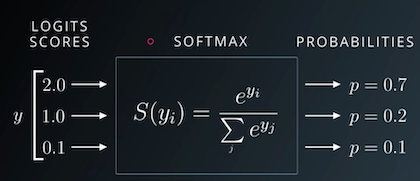
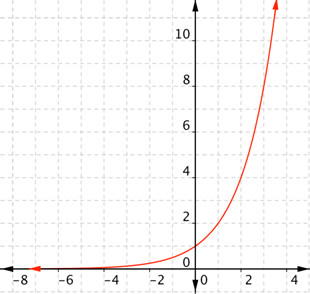

In [126]:
import torch.nn.functional as F

In [127]:
# Apply softmax for each row
probs = F.softmax(outputs, dim=1) # which dimension you want to apply softmax and sum to be 1.

#In this case, outputs is 2D and we want the 2nd dimension (0 is row and 1 is column - 2nd dimension)

print(probs.shape) ## 100 rows and 10 output neurons

## Look at some probabilities
print("Sample Probabilities: ", probs[:2].data) # print two rows of 10 probabilities each [0:2] which is also [:2]

## Add up probabilities
print("Add up Probabilities: ", torch.sum(probs[0]).item())

torch.Size([500, 10])
Sample Probabilities:  tensor([[1.9357e-40, 4.4650e-23, 5.5078e-29, 8.4241e-26, 1.0486e-17, 7.0065e-44,
         9.9992e-01, 7.6911e-05, 1.2184e-37, 0.0000e+00],
        [2.1818e-27, 0.0000e+00, 4.0638e-44, 0.0000e+00, 3.4803e-04, 0.0000e+00,
         1.6751e-01, 8.3214e-01, 0.0000e+00, 2.8932e-27]])
Add up Probabilities:  1.0


In [128]:
max_probs, preds = torch.max(probs, dim=1) #same logic as above for dimension. 

In [129]:
preds

tensor([6, 7, 4, 6, 6, 7, 2, 6, 6, 6, 0, 7, 6, 6, 5, 8, 6, 6, 6, 6, 6, 7, 4, 6,
        7, 6, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 4, 7, 1, 5, 4, 6, 7, 7, 6, 7, 6,
        6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 7, 4, 0, 6, 6, 6, 5,
        6, 6, 6, 4, 5, 7, 7, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 9, 0, 7, 7, 7, 7,
        4, 6, 6, 6, 6, 7, 6, 6, 7, 6, 7, 6, 6, 4, 6, 2, 6, 1, 6, 7, 2, 6, 4, 4,
        7, 7, 7, 6, 6, 2, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6,
        6, 6, 6, 6, 6, 4, 7, 6, 9, 6, 4, 9, 6, 4, 6, 6, 6, 6, 6, 7, 4, 2, 1, 6,
        2, 4, 6, 6, 6, 7, 6, 0, 6, 2, 6, 7, 6, 2, 7, 6, 6, 6, 7, 7, 4, 0, 7, 6,
        6, 6, 6, 6, 6, 7, 4, 6, 6, 6, 7, 4, 6, 2, 6, 6, 6, 6, 6, 4, 4, 4, 9, 6,
        6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 2, 7, 6, 6, 7, 7, 2, 4, 6, 6, 7, 6,
        4, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 0, 7, 6, 6, 6, 7, 6, 6, 6, 6,
        7, 4, 2, 6, 7, 6, 7, 6, 4, 4, 6, 6, 6, 0, 6, 6, 6, 6, 8, 6, 6, 6, 4, 6,
        6, 6, 6, 9, 6, 6, 6, 5, 9, 6, 6,

In [130]:
labels

tensor([4, 8, 9, 8, 0, 9, 9, 5, 0, 7, 5, 6, 8, 2, 3, 7, 5, 0, 0, 4, 2, 3, 5, 0,
        9, 5, 6, 1, 9, 0, 4, 4, 5, 9, 8, 7, 6, 4, 9, 1, 9, 3, 2, 9, 9, 3, 9, 8,
        1, 3, 7, 0, 6, 0, 0, 2, 8, 4, 4, 7, 3, 8, 2, 8, 4, 3, 0, 4, 6, 1, 8, 7,
        1, 0, 2, 8, 7, 4, 2, 1, 8, 2, 7, 1, 1, 3, 8, 1, 7, 6, 7, 7, 4, 9, 9, 4,
        7, 2, 7, 9, 2, 9, 7, 8, 6, 6, 3, 6, 1, 7, 1, 5, 0, 5, 0, 9, 7, 2, 9, 3,
        5, 5, 1, 1, 7, 9, 0, 5, 4, 3, 4, 2, 5, 8, 6, 3, 0, 0, 0, 8, 1, 4, 3, 4,
        3, 6, 0, 9, 0, 1, 9, 3, 3, 4, 9, 3, 0, 7, 1, 7, 3, 0, 6, 4, 4, 9, 9, 5,
        7, 9, 9, 5, 2, 5, 9, 6, 1, 7, 7, 5, 4, 3, 2, 2, 4, 0, 3, 4, 1, 7, 9, 3,
        4, 5, 2, 8, 8, 9, 3, 9, 7, 2, 3, 4, 8, 0, 2, 8, 2, 3, 0, 4, 1, 5, 3, 6,
        3, 7, 6, 4, 0, 0, 6, 9, 0, 3, 5, 3, 7, 1, 0, 7, 2, 1, 1, 8, 6, 2, 4, 6,
        9, 2, 2, 5, 4, 6, 8, 8, 1, 2, 0, 2, 7, 0, 7, 6, 8, 7, 6, 1, 4, 7, 5, 2,
        1, 4, 7, 2, 3, 7, 4, 1, 1, 3, 0, 8, 3, 7, 6, 6, 1, 6, 2, 0, 9, 5, 8, 3,
        6, 6, 1, 3, 5, 0, 3, 3, 3, 6, 6,

# Evaluation Metric and Loss Function

In [131]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [132]:
print(accuracy(preds, labels))

0.106


Cross Entropy Loss - Intuitive Example

In [133]:
## Label
l_temp = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) # Label is 2
## Probabilities
p_temp = np.array([0.01, 0.12, 0.08, 0.001, 0.001, 0.003, 0.005, 0.6, 0.1, 0.15]) #should sum up to 1, ignore for now if it doesnt

loss = l_temp * p_temp
loss = loss[loss != 0]
loss = loss[0]
print("prob : " ,  loss)

import math
log_loss = -math.log(loss)
print("log loss: ", log_loss)

prob :  0.12
log loss:  2.120263536200091


when prob of label ```2``` is close to ```1.0```

In [134]:
## Label
l_temp = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) # Label is 2
## Probabilities
p_temp = np.array([0.01, 0.92, 0.08, 0.001, 0.001, 0.003, 0.005, 0.12, 0.1, 0.15]) #should sum up to 1, ignore for now if it doesnt


loss = l_temp * p_temp
loss = loss[loss != 0]
loss = loss[0]
print("prob : " ,  loss)

import math
log_loss = -math.log(loss)
print("log loss: ", log_loss)

prob :  0.92
log loss:  0.08338160893905101


The above is for a single row. For a batch we take the ```average``` of this loss

In [135]:
import torch.nn.functional as F

loss_fn = F.cross_entropy

In [136]:
outputs.shape, labels.shape

(torch.Size([500, 10]), torch.Size([500]))

In [137]:
#loss = loss_fn(outputs, labels.type(torch.LongTensor)) # if the labels was float and not int then convert to int
loss = loss_fn(outputs, labels) # labels should be int and not float

In [138]:
loss

tensor(86.2888, grad_fn=<NllLossBackward>)

In [139]:
np.exp(-loss.item())

3.351524022240048e-38

# Optimizer

In [140]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [183]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None ):
    preds = model(xb) # Notice it calls forward fucntion
    loss = loss_func(preds, yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
        
    return loss.item(), len(xb), metric_result

In [281]:
def evaluate(model, loss_func, valid_dl, metric):
    with torch.no_grad(): ## needed because we dont want to recompute gradients for validation data
        results = [loss_batch(model, loss_func, xb, yb, opt=None, metric = metric) 
                   for xb, yb in valid_dl]
        
        # results will be stored for each batch of validation data
        
        losses, batch_size_list, metric_values = zip(*results) #unlist and separate each
        total_validation_rows = np.sum(batch_size_list)
        avg_loss = np.sum(np.multiply(losses , batch_size_list)) / total_validation_rows 
        #batch size could be different for the last batch so doing weighted average
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metric_values, batch_size_list)) / total_validation_rows
            
        return avg_loss, total_validation_rows, avg_metric

# Accuracy Metric

In [282]:
def accuracy(outputs, labels):
    # Apply softmax for each row
    probs = F.softmax(outputs, dim=1) 
    _, preds = torch.max(probs, dim = 1) 
    
    return torch.sum(preds == labels).item() / len(labels)

```_``` gives the probability, ```preds``` gives the predicted label (index)

we can directly use the ```outputs``` in ```torch.max``` if we are not worried about getting the probability and logit itself is fine

In [283]:
accuracy(outputs, labels)

0.106

In [284]:
val_loss, val_rows, val_metric = evaluate(model, loss_fn, val_loader, accuracy)
val_loss, val_rows, val_metric

(2.3037910908460617, 12000, 0.8625833333333334)

Generally model with random weights should have similar loss and accuracy on train and validation set. Just to ensure the validation set doesnt show any distribution shift

# Fitting the model

In [294]:
def fit(epochs, model, loss_fn, opt, train_dl, val_dl, metric = None):
    for epoch in range(epochs):
        # TRAINING
        for xb, yb in train_dl:
            loss,_1,_2 = loss_batch(model, loss_fn, xb, yb, opt, metric)

        # EVALUATION on train data
        result = evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric = result
        
        print()
        print(f'Epoch: {epoch + 1}/{epochs}')
        print(f'Loss: {round(val_loss, 3)}')
        if metric is not None:
            print(f'{metric.__name__} : {round(val_metric*100, 2)}%')
        

In [295]:
fit(1, model, loss_fn, optimizer, train_loader, val_loader, accuracy)


Epoch: 1/1
Loss: 2.116
accuracy : 86.82%


In [296]:
# Redefine model and optimizer
model = MNISTModel()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)
loss_fn = F.cross_entropy

In [297]:
fit(5, model, loss_fn, optimizer, train_loader, val_loader, metric = accuracy)


Epoch: 1/5
Loss: 4.495
accuracy : 79.79%

Epoch: 2/5
Loss: 3.346
accuracy : 83.32%

Epoch: 3/5
Loss: 2.872
accuracy : 84.68%

Epoch: 4/5
Loss: 2.55
accuracy : 85.58%

Epoch: 5/5
Loss: 2.346
accuracy : 86.18%


In [ ]:
# Predicting for one image at a time

In [332]:
def predict_image(img, model):
    y = model(img)
    probs = F.softmax(y, dim=1)
    prob, preds = torch.max(probs, dim=1)
    print(probs)
    return prob.item(), preds.item()

In [333]:
type(test_dataset)

torchvision.datasets.mnist.MNIST

try ```1839``` for incorrect prediction

(28, 28)
(1, 1, 28, 28)
2


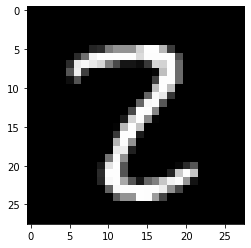

In [359]:
image, label = test_dataset[1839]
image = np.array(image)
print(image.shape)
plt.imshow(image, cmap='gray')
image = np.expand_dims(image, axis = 0)
image = np.expand_dims(image, axis = 0)
print(image.shape)
print(label)


In [360]:
predict_image(torch.from_numpy(image.astype(np.float32)), model)

tensor([[1.5327e-22, 1.7463e-27, 1.0071e-02, 1.2900e-06, 0.0000e+00, 2.1580e-25,
         4.1703e-35, 1.6285e-33, 9.8993e-01, 6.0839e-32]],
       grad_fn=<SoftmaxBackward>)


(0.9899272918701172, 8)

# Overall accuracy on the test dataset

In [362]:
test_dataset_np = []
test_dataset_label_np = []

for image, label in test_dataset:
    image = np.array(image)
    image = np.expand_dims(image, axis = 0)
    image = np.expand_dims(image, axis = 0)
    test_dataset_np.append(image.astype(np.float32))
    test_dataset_label_np.append(int(label))
    
test_dataset_np = np.array(test_dataset_np)
test_dataset_label_np = np.array(test_dataset_label_np)

In [364]:
test_dataset_ts = torch.from_numpy(test_dataset_np)
test_dataset_label_ts = torch.from_numpy(test_dataset_label_np)
test_dataset = TensorDataset(test_dataset_ts, test_dataset_label_ts)

In [365]:
test_loader = DataLoader(test_dataset, batch_size=200)

In [368]:
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, accuracy)
print(f'test_loss: {round(test_loss,2)}, total : {total}, test_acc : {round(test_acc*100, 2)}%')

test_loss: 2.19, total : 10000, test_acc : 87.03%


# Save the model

In [369]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

# Load the model back

In [372]:
model2 = MNISTModel()
model2.load_state_dict(torch.load("./mnist-logistic.pth"))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-6.0746e-03, -3.1684e-02,  2.7187e-02,  ...,  1.1825e-02,
                        4.9426e-03, -1.3230e-02],
                      [ 5.9720e-03,  7.0425e-03,  3.1283e-02,  ...,  2.0709e-02,
                       -2.9150e-02, -9.0719e-03],
                      [-3.5715e-04, -8.6941e-03,  2.3711e-02,  ...,  7.7115e-03,
                       -6.5509e-03,  3.0326e-02],
                      ...,
                      [-2.3728e-02,  8.7987e-03, -1.1516e-02,  ..., -3.3419e-02,
                        2.8235e-02,  1.5121e-02],
                      [-2.5879e-02,  1.9876e-02,  2.2009e-02,  ...,  3.0362e-03,
                        4.6877e-03, -2.6529e-03],
                      [ 4.8470e-05,  2.1684e-02, -3.3421e-02,  ..., -1.7927e-02,
                       -3.3045e-02,  7.7695e-03]])),
             ('linear.bias',
              tensor([ 0.0354, -0.0316,  0.0288,  0.0164,  0.0185,  0.0080,  0.0010,  0.0248,
                      -0.0130,

sanity. try the above test dataset on ```model2```

In [373]:
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, accuracy)
print(f'test_loss: {round(test_loss,2)}, total : {total}, test_acc : {round(test_acc*100, 2)}%')

test_loss: 2.19, total : 10000, test_acc : 87.03%
